In [1]:
# Загрузка зависимостей
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

Using TensorFlow backend.


In [2]:
# Загрузка подготовленного набора данных
dataset = pd.read_csv('prepared_data.csv')
dataset.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,num
0,0.927622,1.0,1.000000,0.624287,-0.206993,1.0,0.000000,0.090789,0.0,0.552201,0.000000,0.0,1.0
1,-2.117138,1.0,0.816497,0.454038,0.159591,0.0,0.397544,1.444548,0.0,0.715169,0.000000,0.0,1.0
2,-1.529863,0.0,0.577350,0.454038,-0.864692,0.0,0.000000,0.931137,0.0,0.398844,1.000000,0.0,1.0
3,0.253797,1.0,0.577350,0.335019,-0.141353,0.0,0.397544,1.141680,0.0,0.265991,1.000000,0.0,1.0
4,0.355054,0.0,0.000000,0.335019,2.100829,0.0,0.397544,0.601134,1.0,0.210865,1.000000,0.0,1.0
5,0.355054,1.0,0.000000,0.568560,-1.150460,0.0,0.397544,0.008368,0.0,0.145476,0.707107,0.0,1.0
6,0.253797,0.0,0.577350,0.568560,1.054214,0.0,0.000000,0.212382,0.0,0.379044,0.707107,0.0,1.0
7,-1.125867,1.0,0.577350,0.335019,0.431579,0.0,0.397544,0.966733,0.0,0.323580,1.000000,0.0,1.0
8,-0.170168,1.0,0.816497,0.909866,-0.982712,1.0,0.397544,0.563348,0.0,0.179818,1.000000,0.0,1.0
9,0.355054,1.0,0.816497,0.679061,-1.750157,0.0,0.397544,1.002123,0.0,0.436427,1.000000,0.0,1.0


In [3]:
X = dataset.drop(columns=['age']).values
Y = dataset['age'].values

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [5]:
# Задаем параметры структуры нейронной сети.


input_layer_size = 12

first_hidden_layer_size = 6
second_hidden_layer_size = 15

output_layer_size = 1


epochs_number = 75
batch_size = 16

In [6]:
# Создание нейронной сети прямого распространения, пока она пустая, т.е. не содержит слоёв и нейронов.
model = Sequential()

# Входной слой и первый скрытый слой, функция активации - ReLU
model.add(Dense(first_hidden_layer_size, input_dim=input_layer_size, activation='relu'))

model.add(Dense(second_hidden_layer_size, activation='relu'))


model.add(Dense(output_layer_size, activation='linear'))

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 78        
_________________________________________________________________
dense_2 (Dense)              (None, 15)                105       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 16        
Total params: 199
Trainable params: 199
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Настройка нейронной сети.
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])

In [9]:
# Обучение нейронной сети.
history = model.fit(X_train, Y_train, validation_data = (X_test,Y_test), epochs=epochs_number, batch_size=batch_size)

Train on 242 samples, validate on 61 samples
Epoch 1/75
242/242 [==============================] - 0s 2ms/step - loss: 1.7527 - mean_absolute_error: 1.0183 - mean_squared_error: 1.7527 - val_loss: 1.0624 - val_mean_absolute_error: 0.8215 - val_mean_squared_error: 1.0624
Epoch 2/75
242/242 [==============================] - 0s 167us/step - loss: 1.4920 - mean_absolute_error: 0.9494 - mean_squared_error: 1.4920 - val_loss: 0.9030 - val_mean_absolute_error: 0.7542 - val_mean_squared_error: 0.9030
Epoch 3/75
242/242 [==============================] - 0s 193us/step - loss: 1.3268 - mean_absolute_error: 0.9037 - mean_squared_error: 1.3268 - val_loss: 0.8133 - val_mean_absolute_error: 0.7232 - val_mean_squared_error: 0.8133
Epoch 4/75
242/242 [==============================] - 0s 208us/step - loss: 1.2201 - mean_absolute_error: 0.8741 - mean_squared_error: 1.2201 - val_loss: 0.7716 - val_mean_absolute_error: 0.7066 - val_mean_squared_error: 0.7716
Epoch 5/75
242/242 [=========================

Epoch 37/75
242/242 [==============================] - 0s 183us/step - loss: 0.7552 - mean_absolute_error: 0.7028 - mean_squared_error: 0.7552 - val_loss: 0.6837 - val_mean_absolute_error: 0.6701 - val_mean_squared_error: 0.6837
Epoch 38/75
242/242 [==============================] - 0s 216us/step - loss: 0.7510 - mean_absolute_error: 0.7008 - mean_squared_error: 0.7510 - val_loss: 0.6826 - val_mean_absolute_error: 0.6703 - val_mean_squared_error: 0.6826
Epoch 39/75
242/242 [==============================] - 0s 193us/step - loss: 0.7508 - mean_absolute_error: 0.7004 - mean_squared_error: 0.7508 - val_loss: 0.6831 - val_mean_absolute_error: 0.6707 - val_mean_squared_error: 0.6831
Epoch 40/75
242/242 [==============================] - 0s 252us/step - loss: 0.7448 - mean_absolute_error: 0.6948 - mean_squared_error: 0.7448 - val_loss: 0.6726 - val_mean_absolute_error: 0.6631 - val_mean_squared_error: 0.6726
Epoch 41/75
242/242 [==============================] - 0s 177us/step - loss: 0.7405 

Epoch 73/75
242/242 [==============================] - 0s 262us/step - loss: 0.6544 - mean_absolute_error: 0.6512 - mean_squared_error: 0.6544 - val_loss: 0.5848 - val_mean_absolute_error: 0.6172 - val_mean_squared_error: 0.5848
Epoch 74/75
242/242 [==============================] - 0s 223us/step - loss: 0.6503 - mean_absolute_error: 0.6463 - mean_squared_error: 0.6503 - val_loss: 0.5836 - val_mean_absolute_error: 0.6153 - val_mean_squared_error: 0.5836
Epoch 75/75
242/242 [==============================] - 0s 272us/step - loss: 0.6505 - mean_absolute_error: 0.6461 - mean_squared_error: 0.6505 - val_loss: 0.5824 - val_mean_absolute_error: 0.6157 - val_mean_squared_error: 0.5824


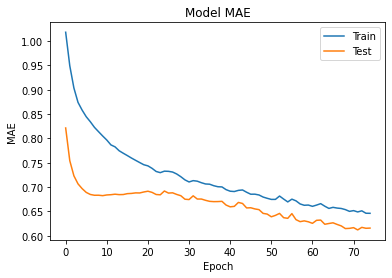

In [10]:
# Выводим динамику среднего абсолютного отклонения от номера эпохи обучения.
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error']) 
plt.title('Model MAE') 
plt.ylabel('MAE') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

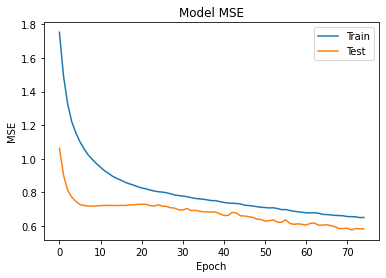

In [11]:
# Выводим динамику среднеквадратического отклонения, т.е. значения функции потерь, от номера эпохи обучения.
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error']) 
plt.title('Model MSE') 
plt.ylabel('MSE') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

In [12]:
# Предсказание уже обученной нейронной сети на обучающей выборке:
Y_pred_train = model.predict(X_train).flatten()

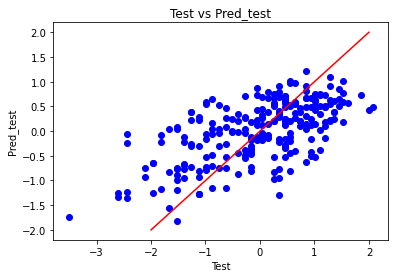

In [13]:
# Сравним эталонные значения Y_train и результат работы обученной нейронной сети Y_pred_train для обучающей выборки.
plt.plot(Y_train, Y_pred_train, 'bo')
plt.plot([-2,2], [-2,2], 'r-')
plt.title('Test vs Pred_test') 
plt.ylabel('Pred_test') 
plt.xlabel('Test') 
plt.show()

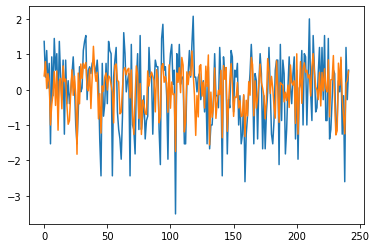

In [14]:
# Выведем сами значения Y_train и Y_pred_train.
plt.plot(Y_train)
plt.plot(Y_pred_train)
plt.show()

In [15]:
# Предсказание обученной нейронной сети на тестовой выборке:
Y_pred_test = model.predict(X_test).flatten()

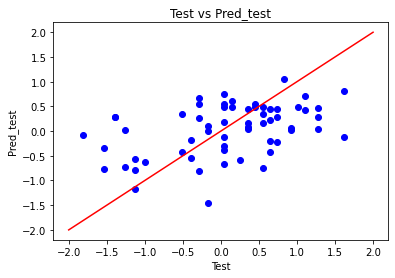

In [16]:
# Сравним эталонные значения Y_test и результат работы обученной нейронной сети Y_pred_test для тестовой выборки.
plt.plot(Y_test, Y_pred_test, 'bo')
plt.plot([-2,2], [-2,2], 'r-')
plt.title('Test vs Pred_test') 
plt.ylabel('Pred_test') 
plt.xlabel('Test') 
plt.show()

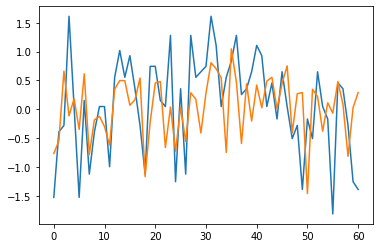

In [17]:
# Выведем сами значения Y_test и Y_pred_test.
plt.plot(Y_test)
plt.plot(Y_pred_test)
plt.show()

In [18]:
# Сравним среднеквадратичные ошибки (значения функции потерь) для обучающей и тестовой выборок.
print(np.sqrt(mean_squared_error(Y_train, Y_pred_train)))
print(np.sqrt(mean_squared_error(Y_test, Y_pred_test)))

0.804067602682099
0.7631713685911042


In [19]:
# Проверим на нормальное распределение разности пар (Y_train, Y_pred_train), (Y_test, Y_pred_test)
k_train, p_train = stats.shapiro(Y_train - Y_pred_train)
print('Train k = {0}, p = {1}'.format(k_train, p_train))

k_test, p_test = stats.shapiro(Y_test - Y_pred_test)
print('Test k = {0}, p = {1}'.format(k_test, p_test))

Train k = 0.9892244338989258, p = 0.0681152194738388
Test k = 0.9840636849403381, p = 0.610715925693512


In [20]:
# Для полной выборки (Y, Y_pred) применим два статистических теста: shapiro и normaltest.
Y_pred = model.predict(X).flatten()

k_s, p_s = stats.shapiro(Y - Y_pred)
print('k_s = {0}, p_s = {1}'.format(k_s, p_s))

k_n, p_n = stats.normaltest(Y - Y_pred)
print('k_n = {0}, p_n = {1}'.format(k_n, p_n))

k_s = 0.989617109298706, p_s = 0.029700132086873055
k_n = 5.196639761633305, p_n = 0.07439847156638689


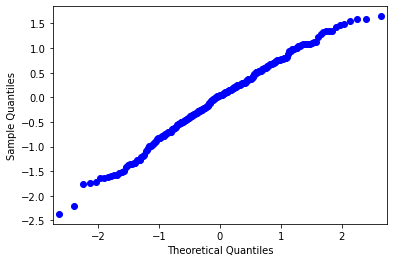

In [21]:
# И тоже самое визуально, с помощью грфиков квантиль-квантиль.
# Обучающая выборка
qqplot(Y_train - Y_pred_train)
plt.show()

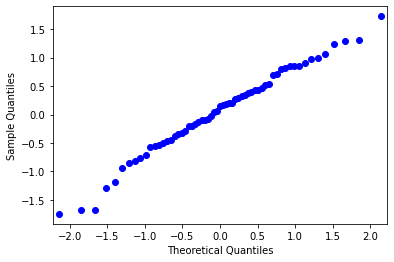

In [22]:
# Тестовая выборка
qqplot(Y_test - Y_pred_test)
plt.show()

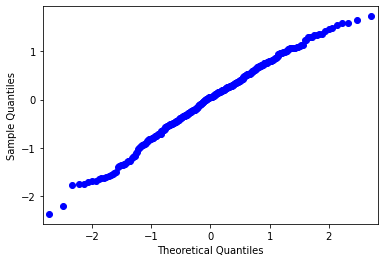

In [23]:
# Полная выборка
qqplot(Y - Y_pred)
plt.show()

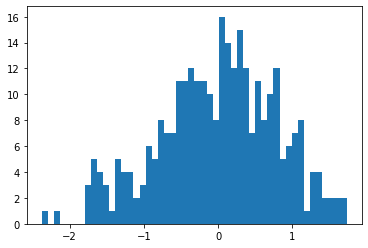

In [24]:
plt.hist(Y - Y_pred, bins=50)
plt.show()

In [25]:
model.save('SimpleNeuralNetwork.h5')